In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [303]:
store_data = pd.read_csv("C:\men3em\semester 5\Data mining Recordings\Dataset of Diabetes .csv")

In [304]:
# Check and print non-unique values for both columns
for col in ['ID', 'No_Pation']:
    duplicates = store_data[store_data.duplicated(col, keep=False)][col]
    if not duplicates.empty:
        print(f"Non-unique {col} values: {duplicates.unique().tolist()}")
    else:
        print(f"All {col} values are unique! ✓")

Non-unique ID values: [82, 132, 64, 97, 126, 106, 138, 174, 7, 9, 10, 42, 47, 71, 72, 83, 88, 89, 96, 98, 99, 102, 134, 137, 139, 141, 143, 144, 145, 147, 149, 150, 153, 154, 157, 161, 165, 166, 171, 180, 181, 182, 186, 190, 197, 85, 4, 189, 16, 19, 123, 68, 12, 20, 41, 60, 79, 81, 133, 135, 146, 152, 178, 18, 24, 39, 48, 57, 69, 87, 61, 127, 58, 108, 198, 110, 113, 119, 122, 162, 168, 140, 67, 109, 31, 129, 173, 176, 179, 183, 185, 195, 187, 188, 191, 194, 200, 76, 86, 1, 37, 159, 15, 3, 36, 46, 59, 91, 120, 21, 160, 184, 6, 65, 73, 177, 100, 163, 55, 56, 75, 118, 62, 63, 33, 74, 92, 156, 49, 158, 22, 196, 51, 111, 112, 151, 30, 13, 17, 45, 192, 5, 54, 27, 175, 94, 14, 105, 38, 84, 32, 2, 52, 28, 103, 104, 29, 117, 155, 80, 142, 70, 53, 136, 167, 66, 95, 78, 116, 90, 164, 23, 121, 170, 8, 11, 34, 93, 128, 25, 107, 131, 43, 77, 125, 172, 130, 101, 44, 26, 199, 193, 124, 148, 114, 115, 50, 40, 35, 169]
Non-unique No_Pation values: [87654, 34290, 34517, 454316, 14389, 24033, 34325, 23972

In [305]:
print(store_data.isnull().sum())

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64


In [306]:
print(store_data["Gender"].unique())
print(store_data["CLASS"].unique())


['F' 'M' 'f']
['N' 'N ' 'P' 'Y' 'Y ']


In [307]:
# Clean the Gender column
store_data["Gender"] = store_data["Gender"].str.strip().str.upper()

# Clean the CLASS column
store_data["CLASS"] = store_data["CLASS"].str.strip().str.upper()

# Now print the unique values again
print(store_data["Gender"].unique())
print(store_data["CLASS"].unique())


['F' 'M']
['N' 'P' 'Y']


In [308]:
duplicates = store_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [309]:
# Document the data quality issues
data_quality_notes = {
    'unique_ids': store_data['ID'].nunique(),
    'total_records': len(store_data),
    'id_duplication_rate': 1 - (store_data['ID'].nunique() / len(store_data)),
    'pation_duplication_rate': 1 - (store_data['No_Pation'].nunique() / len(store_data))
}
print("Data Quality Report:", data_quality_notes)

Data Quality Report: {'unique_ids': 800, 'total_records': 1000, 'id_duplication_rate': 0.19999999999999996, 'pation_duplication_rate': 0.039000000000000035}


In [310]:
store_data.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


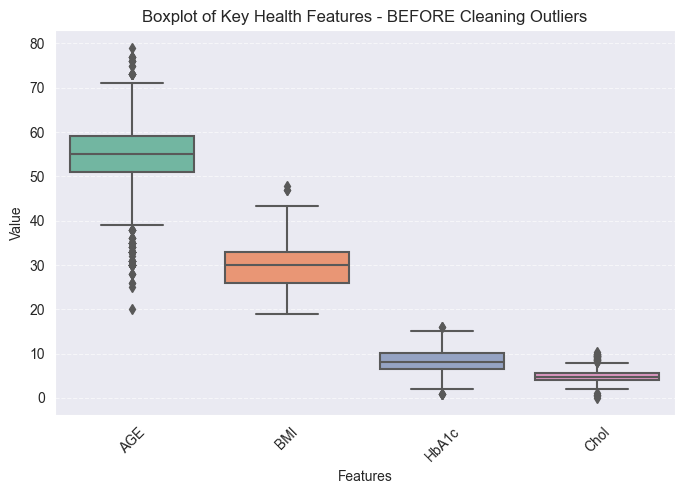

In [311]:
cols_to_plot = ['AGE', 'BMI', 'HbA1c', 'Chol']

plt.figure(figsize=(8, 5))
sns.boxplot(data=store_data[cols_to_plot], palette="Set2")

plt.title("Boxplot of Key Health Features - BEFORE Cleaning Outliers")
plt.xlabel("Features")
plt.ylabel("Value")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

Top correlated features with HbA1c BEFORE removing outliers: ['HbA1c', 'BMI', 'AGE', 'TG', 'Chol']


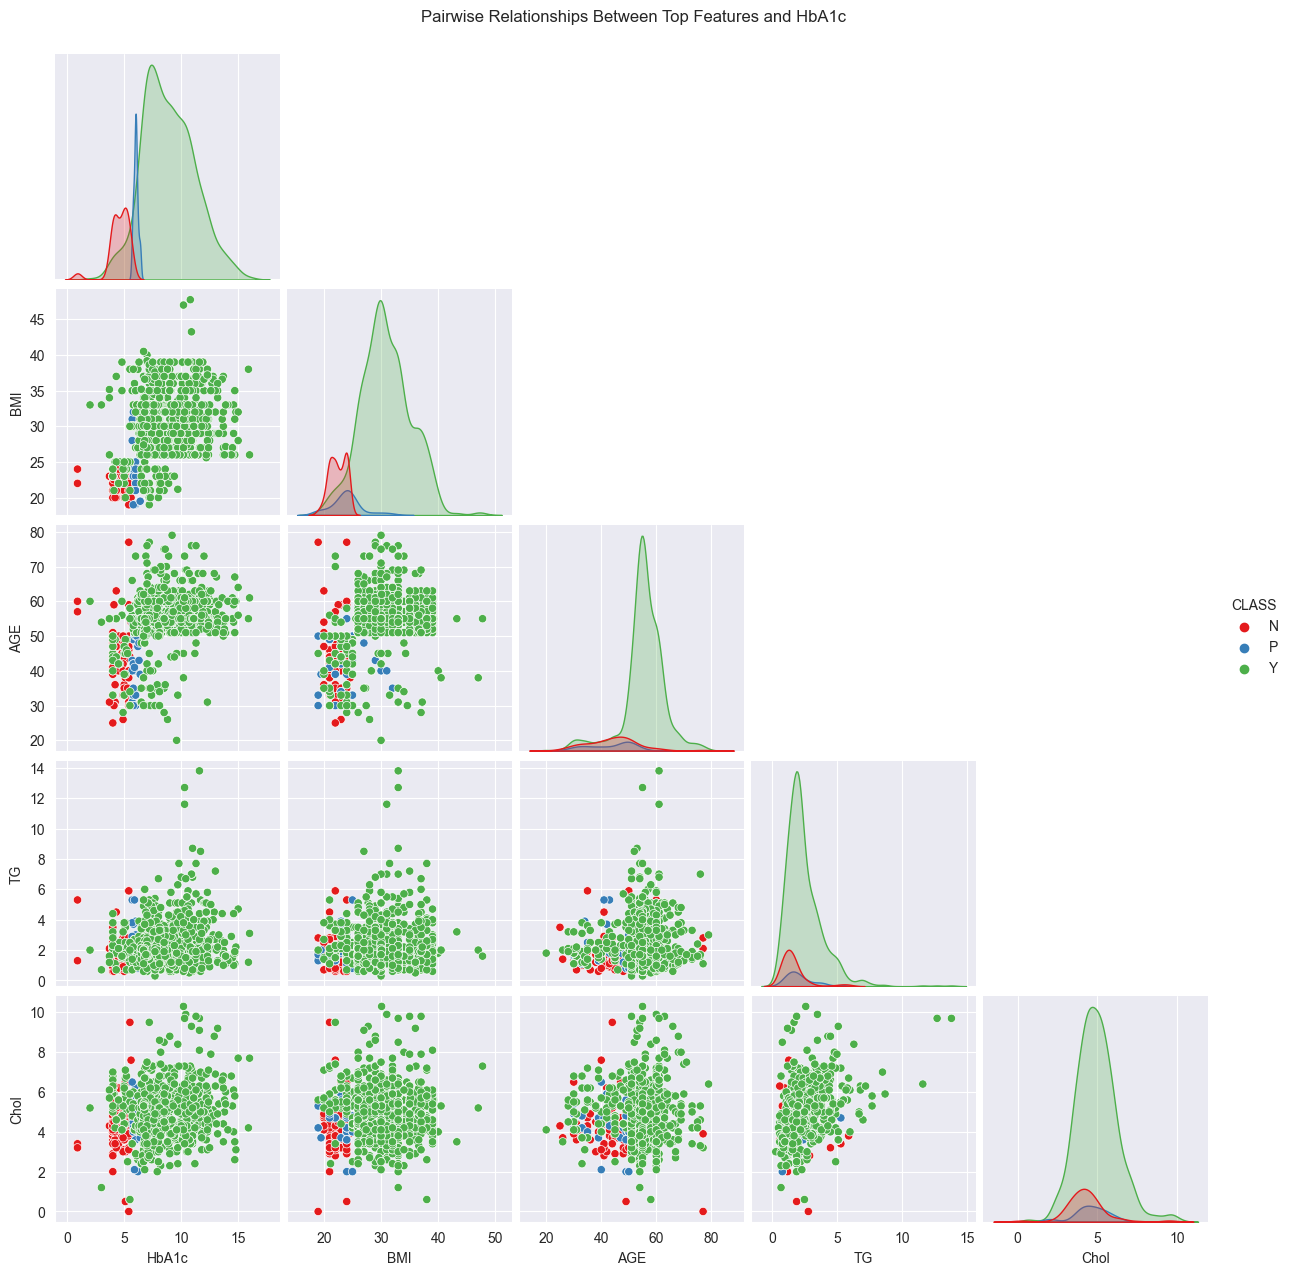

In [312]:
#Drop unnecessary columns
numeric_data = store_data.drop(columns=['ID', 'No_Pation'], errors='ignore')

#Keep only numeric columns
numeric_data = numeric_data.select_dtypes(include='number')

#Compute correlations with HbA1c
corr = numeric_data.corr()

#Selecting top 5 most correlated features with HbA1c
top_features = corr['HbA1c'].abs().sort_values(ascending=False).head(5).index
print("Top correlated features with HbA1c BEFORE removing outliers:", top_features.to_list())

#Plot pairwise relationships for those features + CLASS
sns.pairplot(
    data=store_data[top_features.to_list() + ['CLASS']],
    hue='CLASS',
    diag_kind='kde',
    palette='Set1',
    corner=True
)
plt.suptitle("Pairwise Relationships Between Top Features and HbA1c", y=1.02)
plt.show()


In [313]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Apply to numerical columns
numerical_cols = ['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']

# Calculate bounds and outliers summary
bounds = {}
outliers_summary = {}
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_iqr(store_data, col)
    outliers_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(store_data)) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }
    bounds[col] = {'lower': lower, 'upper': upper}
    print(f"{col} bounds -> Lower: {lower:.2f}, Upper: {upper:.2f}")
    print(f"{col}: {len(outliers)} outliers ({outliers_summary[col]['percentage']:.2f}%)\n")

AGE bounds -> Lower: 39.00, Upper: 71.00
AGE: 98 outliers (9.80%)

Urea bounds -> Lower: 0.70, Upper: 8.70
Urea: 65 outliers (6.50%)

Cr bounds -> Lower: 10.50, Upper: 110.50
Cr: 52 outliers (5.20%)

HbA1c bounds -> Lower: 0.95, Upper: 15.75
HbA1c: 6 outliers (0.60%)

Chol bounds -> Lower: 1.60, Upper: 8.00
Chol: 27 outliers (2.70%)

TG bounds -> Lower: -0.60, Upper: 5.00
TG: 55 outliers (5.50%)

HDL bounds -> Lower: 0.30, Upper: 1.90
HDL: 50 outliers (5.00%)

LDL bounds -> Lower: -0.45, Upper: 5.55
LDL: 11 outliers (1.10%)

VLDL bounds -> Lower: -0.50, Upper: 2.70
VLDL: 74 outliers (7.40%)

BMI bounds -> Lower: 15.50, Upper: 43.50
BMI: 3 outliers (0.30%)



In [314]:
cleaned_data_iqr = store_data.copy()
for col in numerical_cols:
    Q1 = cleaned_data_iqr[col].quantile(0.25)
    Q3 = cleaned_data_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    cleaned_data_iqr = cleaned_data_iqr[(cleaned_data_iqr[col] >= lower) & (cleaned_data_iqr[col] <= upper)]

print(f"Outliers removed using IQR method.")
print(f"Original rows: {len(store_data)} → Cleaned rows: {len(cleaned_data_iqr)}")

Outliers removed using IQR method.
Original rows: 1000 → Cleaned rows: 678


In [315]:
def detect_outliers_zscore(data, column, threshold=2):
    mean = data[column].mean()
    std = data[column].std()
    z_scores = np.abs((data[column] - mean) / std)
    outliers = data[z_scores > threshold]
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    return outliers, lower_bound, upper_bound

# Dictionaries to store results
zscore_bounds = {}
zscore_outliers_summary = {}

print("=== Z-score Outlier Detection ===")
for col in numerical_cols:
    outliers, lower, upper = detect_outliers_zscore(store_data, col, threshold=2)

    # Store summary and bounds
    zscore_outliers_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(store_data)) * 100
    }
    zscore_bounds[col] = {'lower': lower, 'upper': upper}

    print(f"{col} bounds -> Lower: {lower:.2f}, Upper: {upper:.2f}")
    print(f"{col}: {len(outliers)} outliers ({zscore_outliers_summary[col]['percentage']:.2f}%)\n")

# Remove outliers using Z-score method
cleaned_data_zscore = store_data.copy()
for col in numerical_cols:
    lower = zscore_bounds[col]['lower']
    upper = zscore_bounds[col]['upper']
    cleaned_data_zscore = cleaned_data_zscore[
        (cleaned_data_zscore[col] >= lower) & (cleaned_data_zscore[col] <= upper)
    ]

print(f"\n==== Z-score Outliers removed successfully.====")
print(f"Original rows: {len(store_data)} → Cleaned rows: {len(cleaned_data_zscore)} (Removed {len(store_data) - len(cleaned_data_zscore)})")


=== Z-score Outlier Detection ===
AGE bounds -> Lower: 35.93, Upper: 71.13
AGE: 88 outliers (8.80%)

Urea bounds -> Lower: -0.75, Upper: 11.00
Urea: 32 outliers (3.20%)

Cr bounds -> Lower: -51.03, Upper: 188.91
Cr: 19 outliers (1.90%)

HbA1c bounds -> Lower: 3.21, Upper: 13.35
HbA1c: 35 outliers (3.50%)

Chol bounds -> Lower: 2.26, Upper: 7.47
Chol: 43 outliers (4.30%)

TG bounds -> Lower: -0.45, Upper: 5.15
TG: 37 outliers (3.70%)

HDL bounds -> Lower: -0.12, Upper: 2.53
HDL: 20 outliers (2.00%)

LDL bounds -> Lower: 0.38, Upper: 4.84
LDL: 30 outliers (3.00%)

VLDL bounds -> Lower: -5.47, Upper: 9.18
VLDL: 48 outliers (4.80%)

BMI bounds -> Lower: 19.65, Upper: 39.50
BMI: 17 outliers (1.70%)


==== Z-score Outliers removed successfully.====
Original rows: 1000 → Cleaned rows: 705 (Removed 295)


In [316]:

scientific_ranges = {
    "AGE": (0, 100),          # years
    "Urea": (1.5, 12.0),      # mmol/L
    "Cr": (30, 180),          # µmol/L
    "HbA1c": (3.5, 15.0),     # %
    "Chol": (2.0, 9.0),       # mmol/L
    "TG": (0.3, 7.0),         # mmol/L
    "HDL": (0.4, 3.5),        # mmol/L
    "LDL": (0.4, 7.0),        # mmol/L
    "VLDL": (0.05, 2.0),      # mmol/L
    "BMI": (10, 60)           # kg/m²
}

# ===Function to detect scientific outliers ===
def detect_outliers_scientific(data, column, min_val, max_val):
    outliers = data[(data[column] < min_val) | (data[column] > max_val)]
    return outliers, min_val, max_val

# ===Apply detection ===
outliers_summary = {}

print("=== SCIENTIFIC OUTLIER DETECTION (Balanced Ranges) ===\n")
for col, (low, high) in scientific_ranges.items():
    if col not in store_data.columns:
        continue

    outliers, lower, upper = detect_outliers_scientific(store_data, col, low, high)
    percentage = (len(outliers) / len(store_data)) * 100

    outliers_summary[col] = {
        "count": len(outliers),
        "percentage": round(percentage, 2)
    }

    print(f"{col}: {len(outliers)} outliers ({percentage:.2f}%) | Range: [{lower}, {upper}]")
    if len(outliers) > 0:
        print(f"   Sample outliers: {outliers[col].sort_values().unique()[:5]} ...\n")
    else:
        print("   No outliers detected.\n")

# ===Combine all outlier rows for verification ===
all_outliers = pd.concat([
    store_data[(store_data[col] < scientific_ranges[col][0]) |
               (store_data[col] > scientific_ranges[col][1])]
    for col in scientific_ranges.keys() if col in store_data.columns
]).drop_duplicates()

print(f"\nTotal rows containing any scientific outlier: {len(all_outliers)}")


=== SCIENTIFIC OUTLIER DETECTION (Balanced Ranges) ===

AGE: 0 outliers (0.00%) | Range: [0, 100]
   No outliers detected.

Urea: 27 outliers (2.70%) | Range: [1.5, 12.0]
   Sample outliers: [ 0.5  1.1  1.2 13.2 13.3] ...

Cr: 43 outliers (4.30%) | Range: [30, 180]
   Sample outliers: [ 6 20 22 23 24] ...

HbA1c: 8 outliers (0.80%) | Range: [3.5, 15.0]
   Sample outliers: [ 0.9  2.   3.  15.9 16. ] ...

Chol: 18 outliers (1.80%) | Range: [2.0, 9.0]
   Sample outliers: [0.  0.5 0.6 1.2 9.1] ...

TG: 9 outliers (0.90%) | Range: [0.3, 7.0]
   Sample outliers: [ 7.2  7.7  8.5  8.7 11.6] ...

HDL: 12 outliers (1.20%) | Range: [0.4, 3.5]
   Sample outliers: [0.2 3.6 3.8 3.9 4. ] ...

LDL: 6 outliers (0.60%) | Range: [0.4, 7.0]
   Sample outliers: [0.3 7.5 7.9 9.9] ...

VLDL: 92 outliers (9.20%) | Range: [0.05, 2.0]
   Sample outliers: [2.1 2.2 2.4 2.5 2.6] ...

BMI: 0 outliers (0.00%) | Range: [10, 60]
   No outliers detected.


Total rows containing any scientific outlier: 180


In [317]:
cleaned_data_scientific = store_data[~store_data.index.isin(all_outliers.index)]
print("Scientific Final cleaned shape:", cleaned_data_scientific.shape)

Scientific Final cleaned shape: (820, 14)


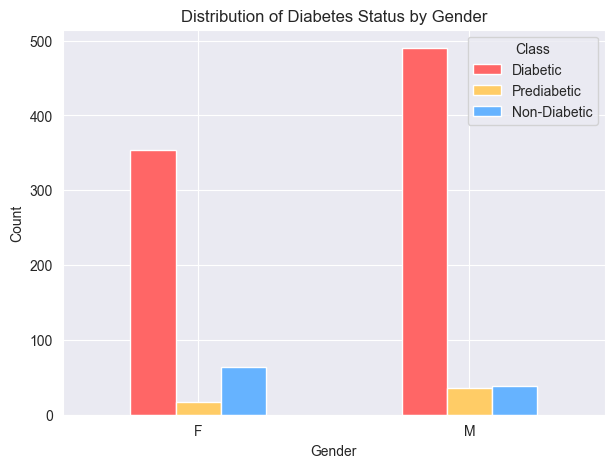

In [318]:
# Count each class by gender
gender_class = store_data.groupby(['Gender', 'CLASS']).size().unstack(fill_value=0)

# Rename columns for clarity
gender_class = gender_class.rename(columns={'Y': 'Diabetic', 'N': 'Non-Diabetic', 'P': 'Prediabetic'})

# Plot bar chart
gender_class[['Diabetic', 'Prediabetic', 'Non-Diabetic']].plot(
    kind='bar',
    figsize=(7,5),
    color=['#ff6666', '#ffcc66', '#66b3ff']
)

plt.title('Distribution of Diabetes Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Class')
plt.show()


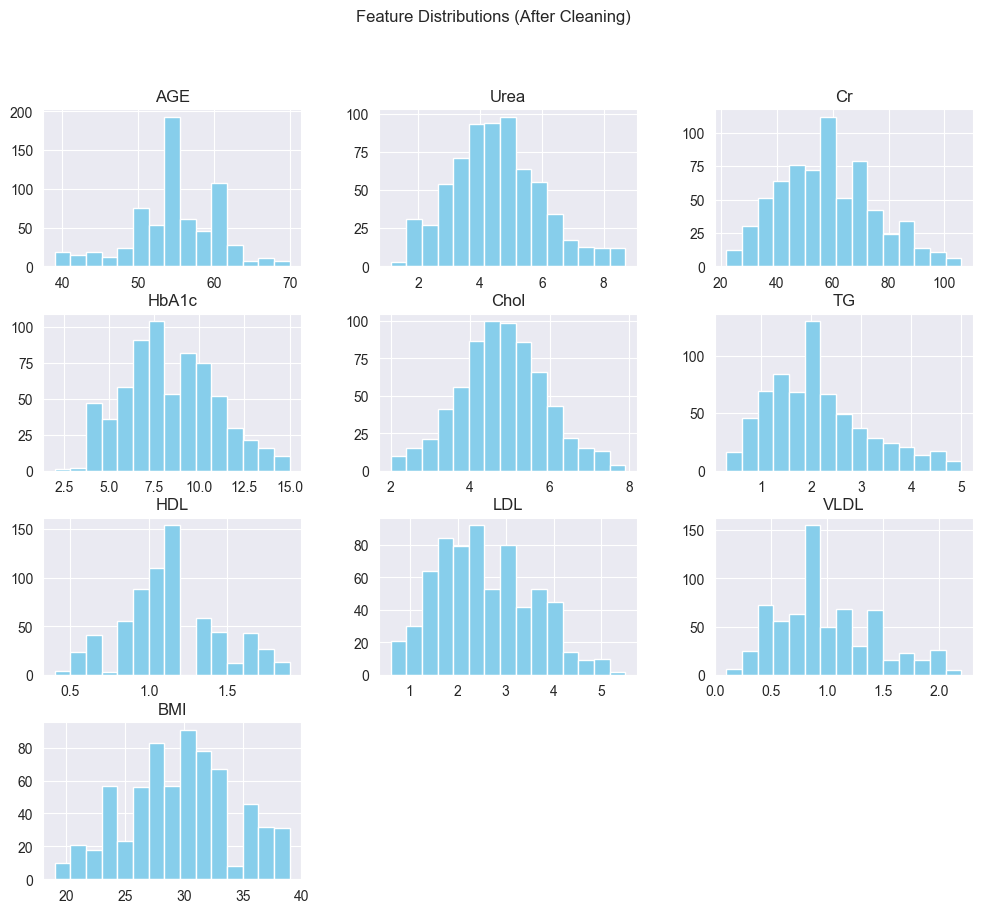

In [319]:
cleaned_data_iqr[numerical_cols].hist(bins=15, figsize=(12, 10), color='skyblue')
plt.suptitle("Feature Distributions (After Cleaning)")
plt.show()

Top correlated features with HbA1c: ['HbA1c', 'AGE', 'BMI', 'VLDL', 'TG']


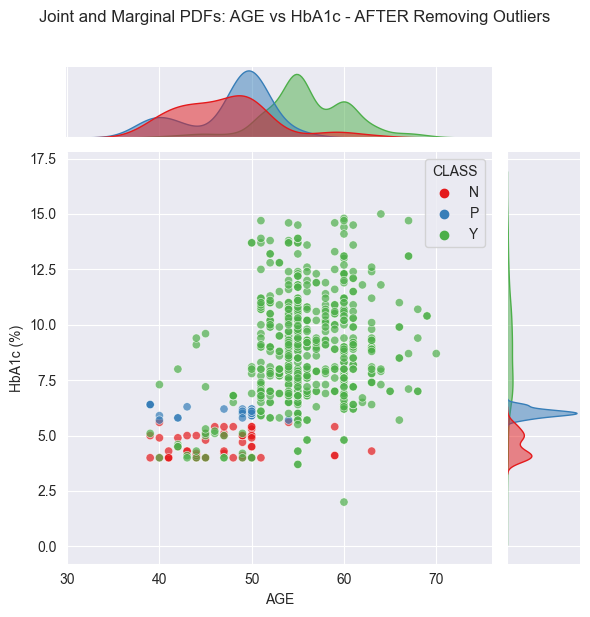

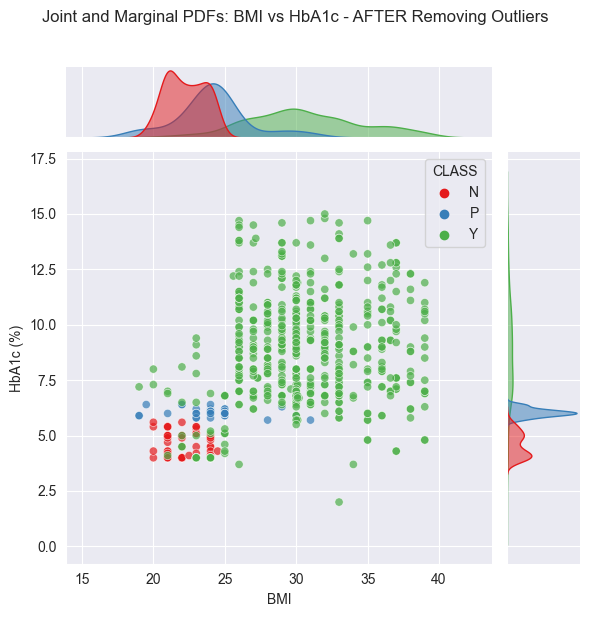

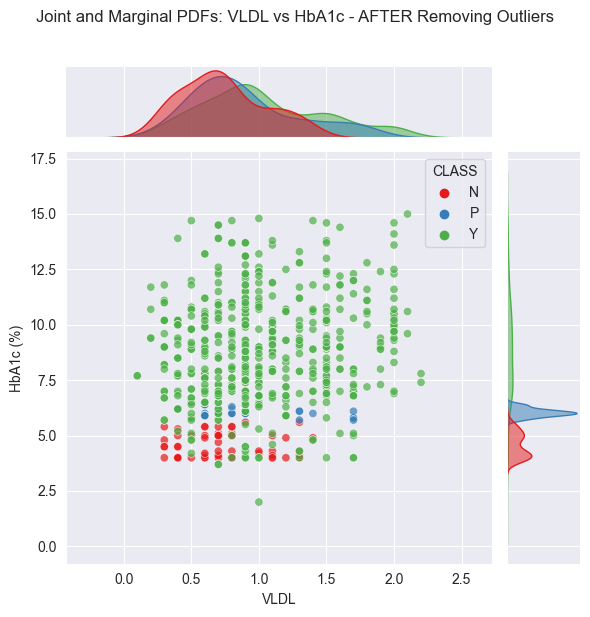

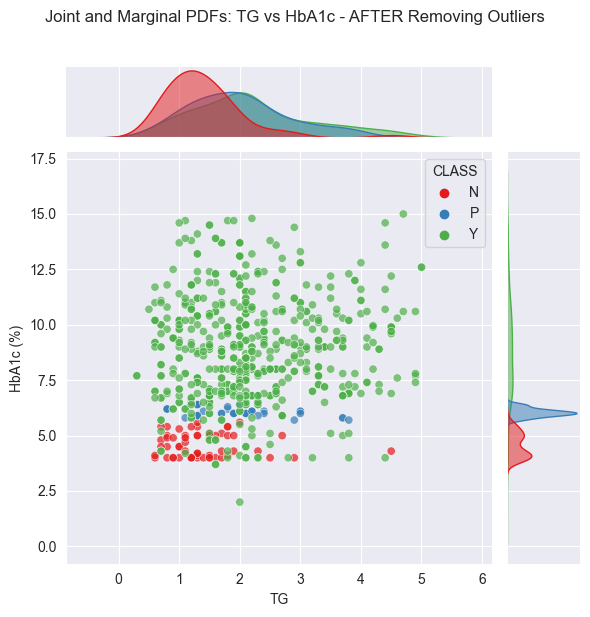

In [320]:
#Dropping ID-like columns
numeric_data = cleaned_data_iqr.drop(columns=['ID', 'No_Pation'], errors='ignore')

#Finding top 5 features most correlated with HbA1c
corr = numeric_data.corr()
top_features = corr['HbA1c'].abs().sort_values(ascending=False).head(5).index  # HbA1c + top 4
print("Top correlated features with HbA1c:", top_features.to_list())

#Plotting joint + marginal PDFs for each top feature vs HbA1c
for feature in top_features:
    if feature == 'HbA1c':  # Skip self-correlation
        continue

    g = sns.JointGrid(data=cleaned_data_iqr, x=feature, y='HbA1c')

    #Joint scatter (center)
    g.plot_joint(sns.scatterplot, data=cleaned_data_iqr, hue='CLASS',
                 palette='Set1', alpha=0.7)

    # Marginal PDFs (top & right)
    g.plot_marginals(
        sns.kdeplot,
        data=cleaned_data_iqr,
        hue='CLASS',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette='Set1'
    )

    #Titles and labels
    g.fig.suptitle(f"Joint and Marginal PDFs: {feature} vs HbA1c - AFTER Removing Outliers", y=1.02)
    g.set_axis_labels(feature, "HbA1c (%)")
    plt.tight_layout()
    plt.show()


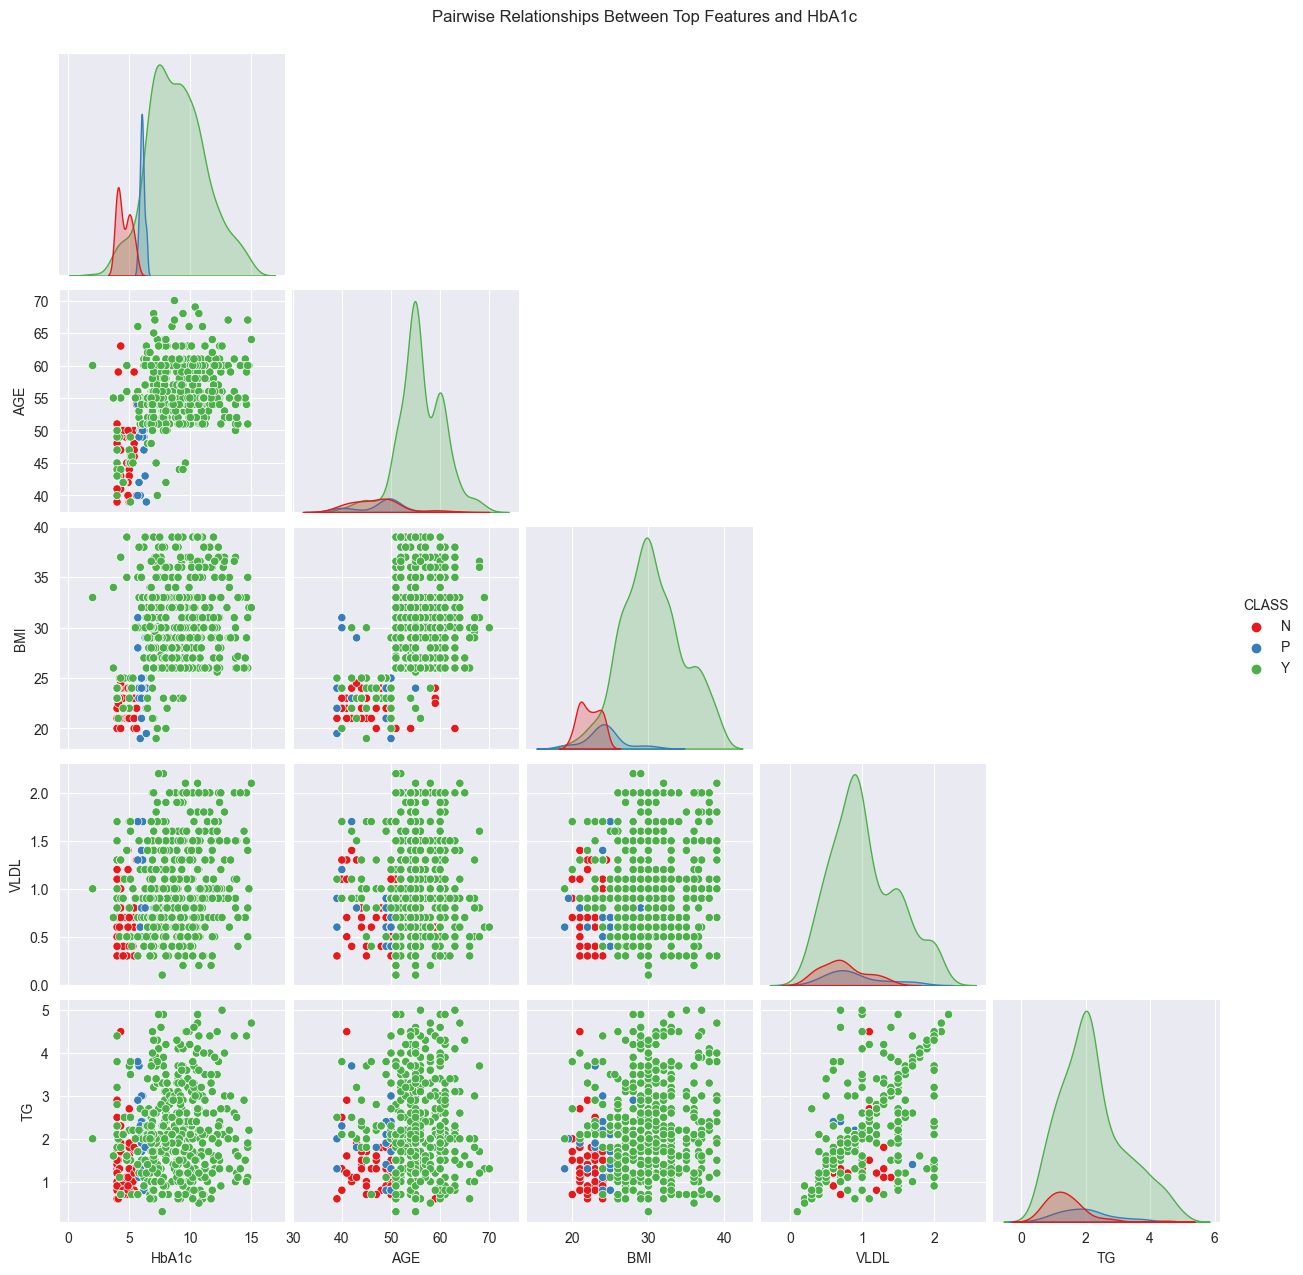

In [321]:
#Plotting pairwise relationships for those features + CLASS
sns.pairplot(
    data=cleaned_data_iqr[top_features.to_list() + ['CLASS']],
    hue='CLASS',
    diag_kind='kde',
    palette='Set1',
    corner=True
)
plt.suptitle("Pairwise Relationships Between Top Features and HbA1c", y=1.02)
plt.show()


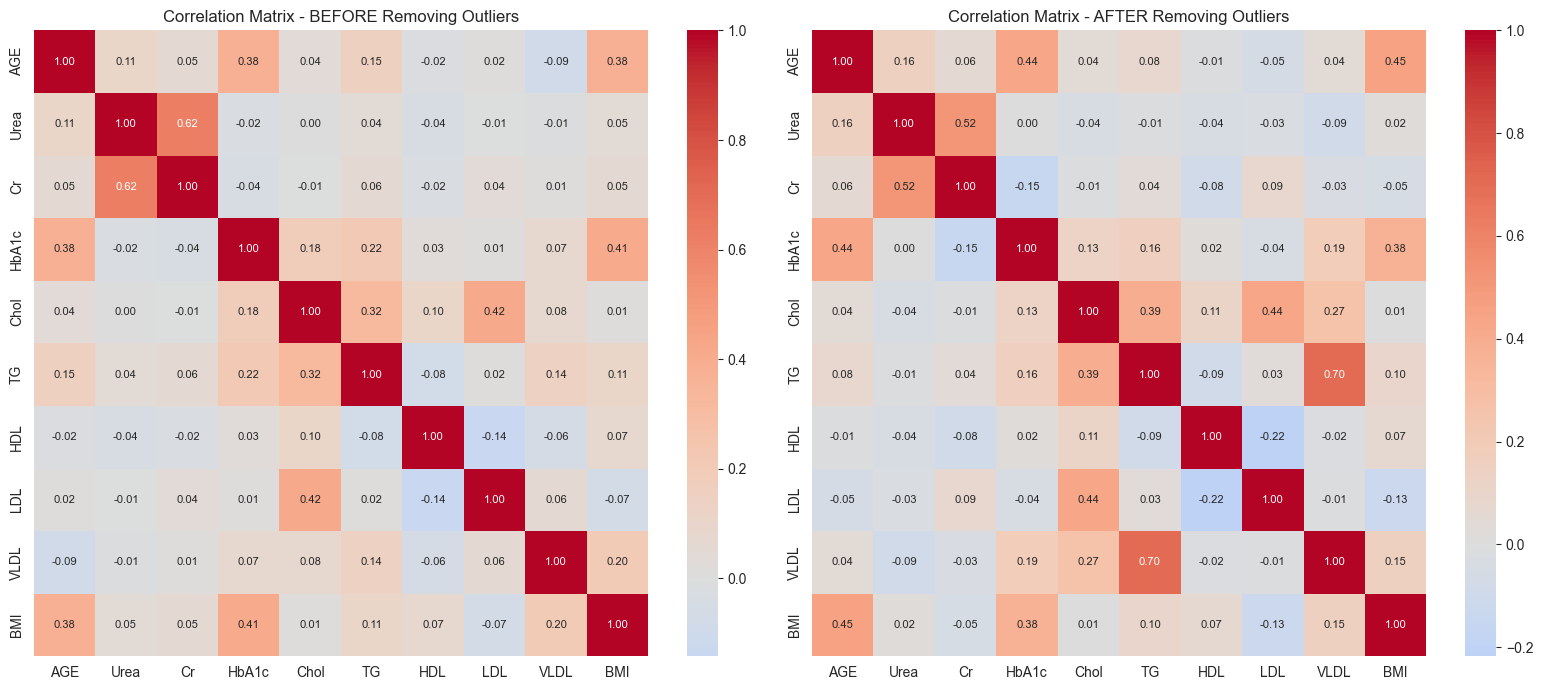

In [322]:
#Compute correlations before and after outlier removal
corr_before = store_data[numerical_cols].corr()
corr_after = cleaned_data_iqr[numerical_cols].corr()

plt.figure(figsize=(16, 7))

#Heatmap before removing outliers
plt.subplot(1, 2, 1)
sns.heatmap(
    corr_before,
    cmap="coolwarm",
    center=0,
    annot=True,          # show numbers
    fmt=".2f",           # two decimal places
    annot_kws={"size": 8} # smaller text
)
plt.title("Correlation Matrix - BEFORE Removing Outliers", fontsize=12)

#Heatmap after removing outliers
plt.subplot(1, 2, 2)
sns.heatmap(
    corr_after,
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8}
)
plt.title("Correlation Matrix - AFTER Removing Outliers", fontsize=12)

plt.tight_layout()
plt.show()


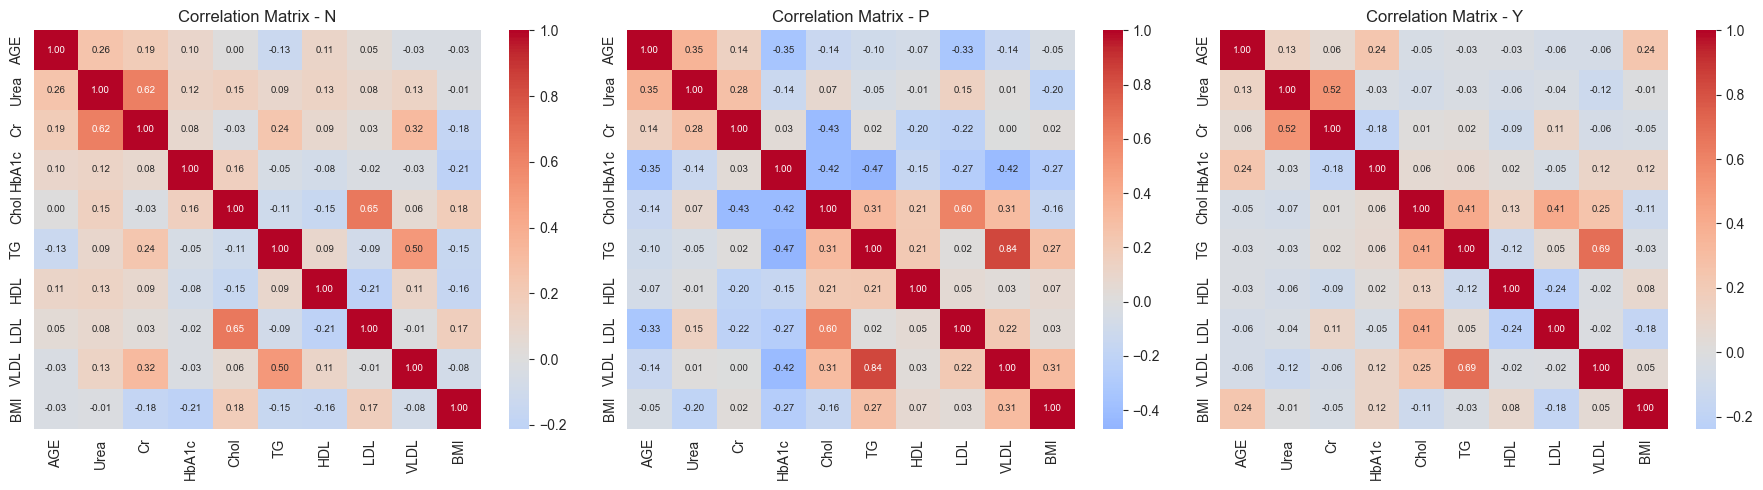

In [323]:
# Get the unique classes
classes = cleaned_data_iqr['CLASS'].unique()

# Set up subplots
plt.figure(figsize=(18, 5))

# Loop over classes
for i, cls in enumerate(classes, 1):
    subset = cleaned_data_iqr[cleaned_data_iqr['CLASS'] == cls]
    corr = subset[numerical_cols].corr()

    plt.subplot(1, len(classes), i)
    sns.heatmap(
        corr,
        cmap='coolwarm',
        center=0,
        annot=True,
        fmt=".2f",
        annot_kws={"size": 7}
    )
    plt.title(f"Correlation Matrix - {cls}", fontsize=12)

plt.tight_layout()
plt.show()


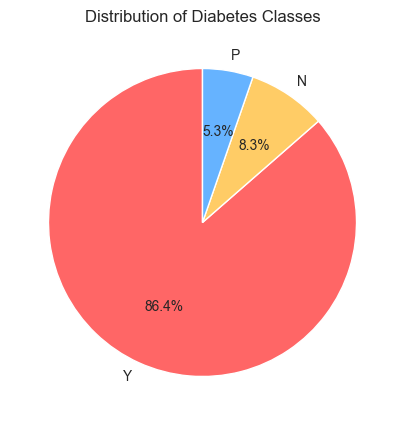

In [324]:
plt.figure(figsize=(5, 5))
cleaned_data_iqr['CLASS'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=['#ff6666', '#ffcc66', '#66b3ff'],
    startangle=90
)
plt.title("Distribution of Diabetes Classes")
plt.ylabel("")
plt.show()

In [325]:
cleaned_data_iqr.to_csv("cleaned_diabetes_dataset_iqr.csv", index=False)
cleaned_data_scientific.to_csv("cleaned_diabetes_dataset_scientific.csv", index=False)
cleaned_data_zscore.to_csv("cleaned_diabetes_zscore.csv", index=False)
print("Cleaned dataset saved for Phase 2.")

Cleaned dataset saved for Phase 2.
